<a href="https://colab.research.google.com/github/Anjalishet6/Machine_Learning_Project/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project:**
# **Marketing Compaign for Banking Products**

# 1.Importing the required libraries and the dataset

In [122]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt       #visualisation
import seaborn as sns                 #visualisation
%matplotlib inline

In [124]:
#uploading the csv file to google colab
dataset =pd.read_csv('bank.csv')

In [123]:
#To display the first 5 rows
dataset.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


In [125]:
#To display the end bottom 5 rows
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


# 1.1 Checking the types of data and basic summary stats

In [126]:
#To display datatype of each column and also display the non-null rows for each column.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [127]:
#To display the summary stats which incliude count,mean,std,min,max,etc
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [128]:
#To display how many null values are present in each column
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#2.Dropping Irrelevant columns

In a machine learning model, it is necessary to seperate signal from a the noise. Hence the ID column which definitely doesnot have any signal is being dropped. Also, the experience column seems to have faulty data as some vaues are negative .We can replace and impute those values, but here i chose to drop this column as well, as it seems to be highly correlated with the age column

In [129]:
experience = dataset['Experience']
age=dataset['Age']
correlation= experience.corr(age)
correlation

0.9942148569683321

In [130]:
dataset = dataset.drop(['ID','Experience'], axis=1)
dataset.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


#3.EDA: Data disribution in each attribute and target variable

In [131]:
# number of unique in each column
dataset.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [133]:
dataset.drop('ZIP Code', axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [134]:
#number of people with 0 mortages
(dataset.Mortgage==0).sum()

3462

In [135]:
#number of people with zero credit cards spending per month
(dataset.CreditCard==0).sum()

3530

In [136]:
###value counts for all categorical columns
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [137]:
dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [138]:
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [139]:
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [140]:
dataset.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [141]:
dataset.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

# Univariate Analysis

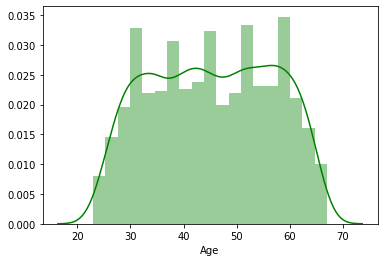

In [26]:
##Age is a symmetric distribution
sns.distplot(dataset.Age, color='green');

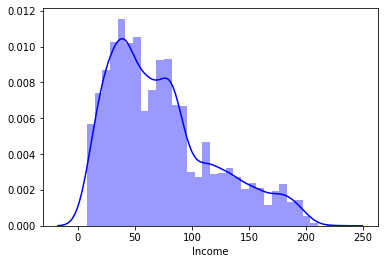

In [142]:
##Income is a skew distribution
sns.distplot(dataset.Income, color='blue');

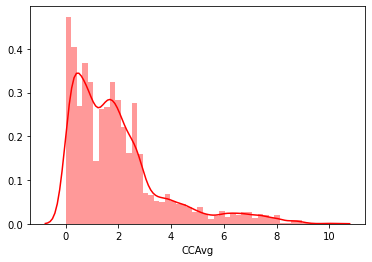

In [143]:
##CCAvg
sns.distplot(dataset.CCAvg, color='red');

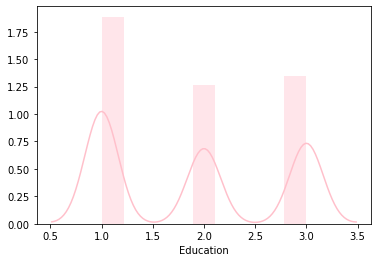

In [144]:
##Education
sns.distplot(dataset.Education, color='pink');

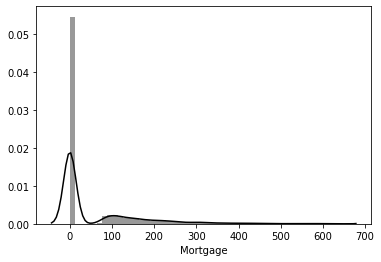

In [145]:
##Mortgage is highly skewed
sns.distplot(dataset.Mortgage, color='black');

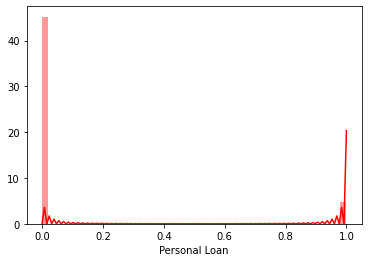

In [146]:
##Personal Loan
sns.distplot(dataset['Personal Loan'], color='red');

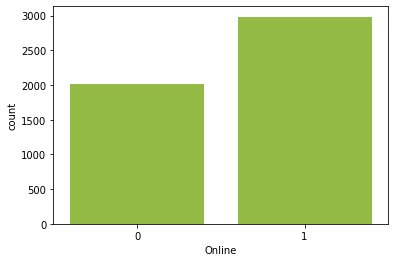

In [147]:
##Online
sns.countplot(dataset['Online'], color='yellowgreen');

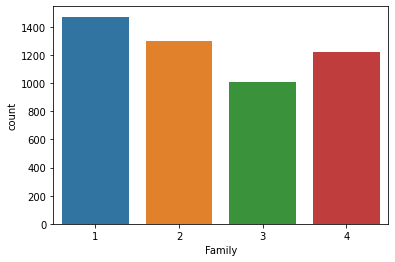

In [148]:
##Family
sns.countplot(dataset.Family);

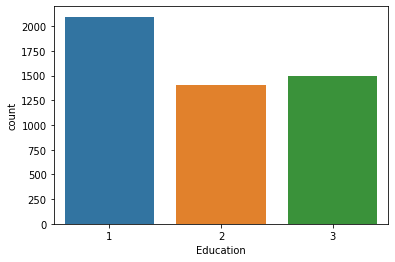

In [149]:
##education
sns.countplot(dataset.Education);

# Multivariate Analysis

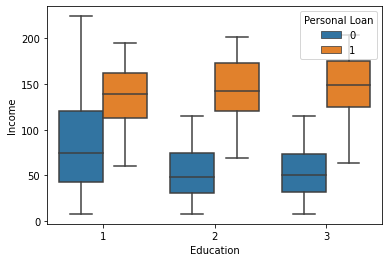

In [150]:
##it says that the person who has more income is granted loan across each education level 
sns.boxplot(x='Education', y='Income',hue='Personal Loan',data=dataset);

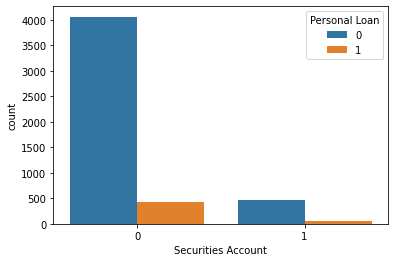

In [151]:
##majority of people who has security account dont have personal loan
sns.countplot(x='Securities Account', data=dataset, hue='Personal Loan');

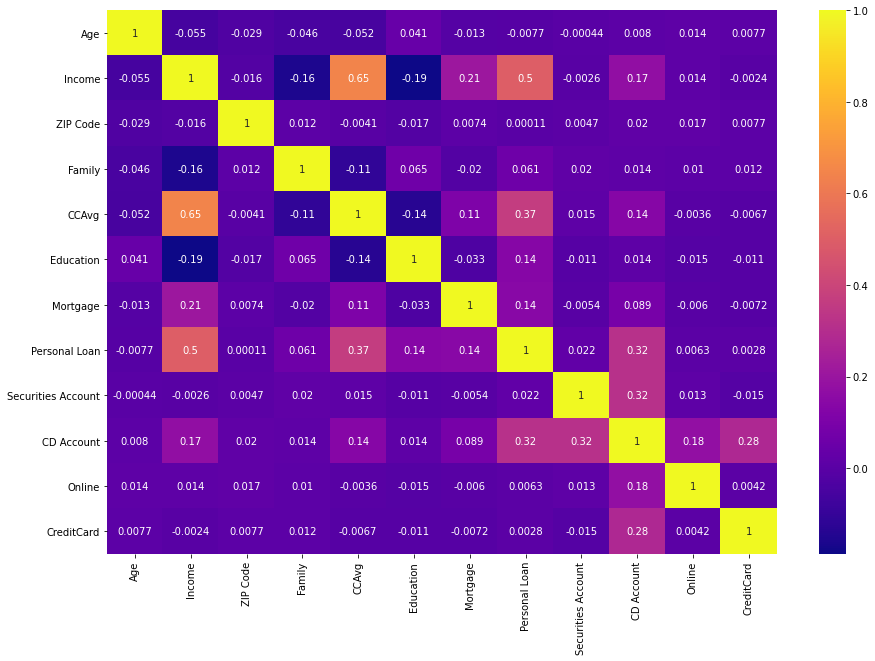

In [152]:
##credit card average and income
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(), cmap='plasma', annot=True);

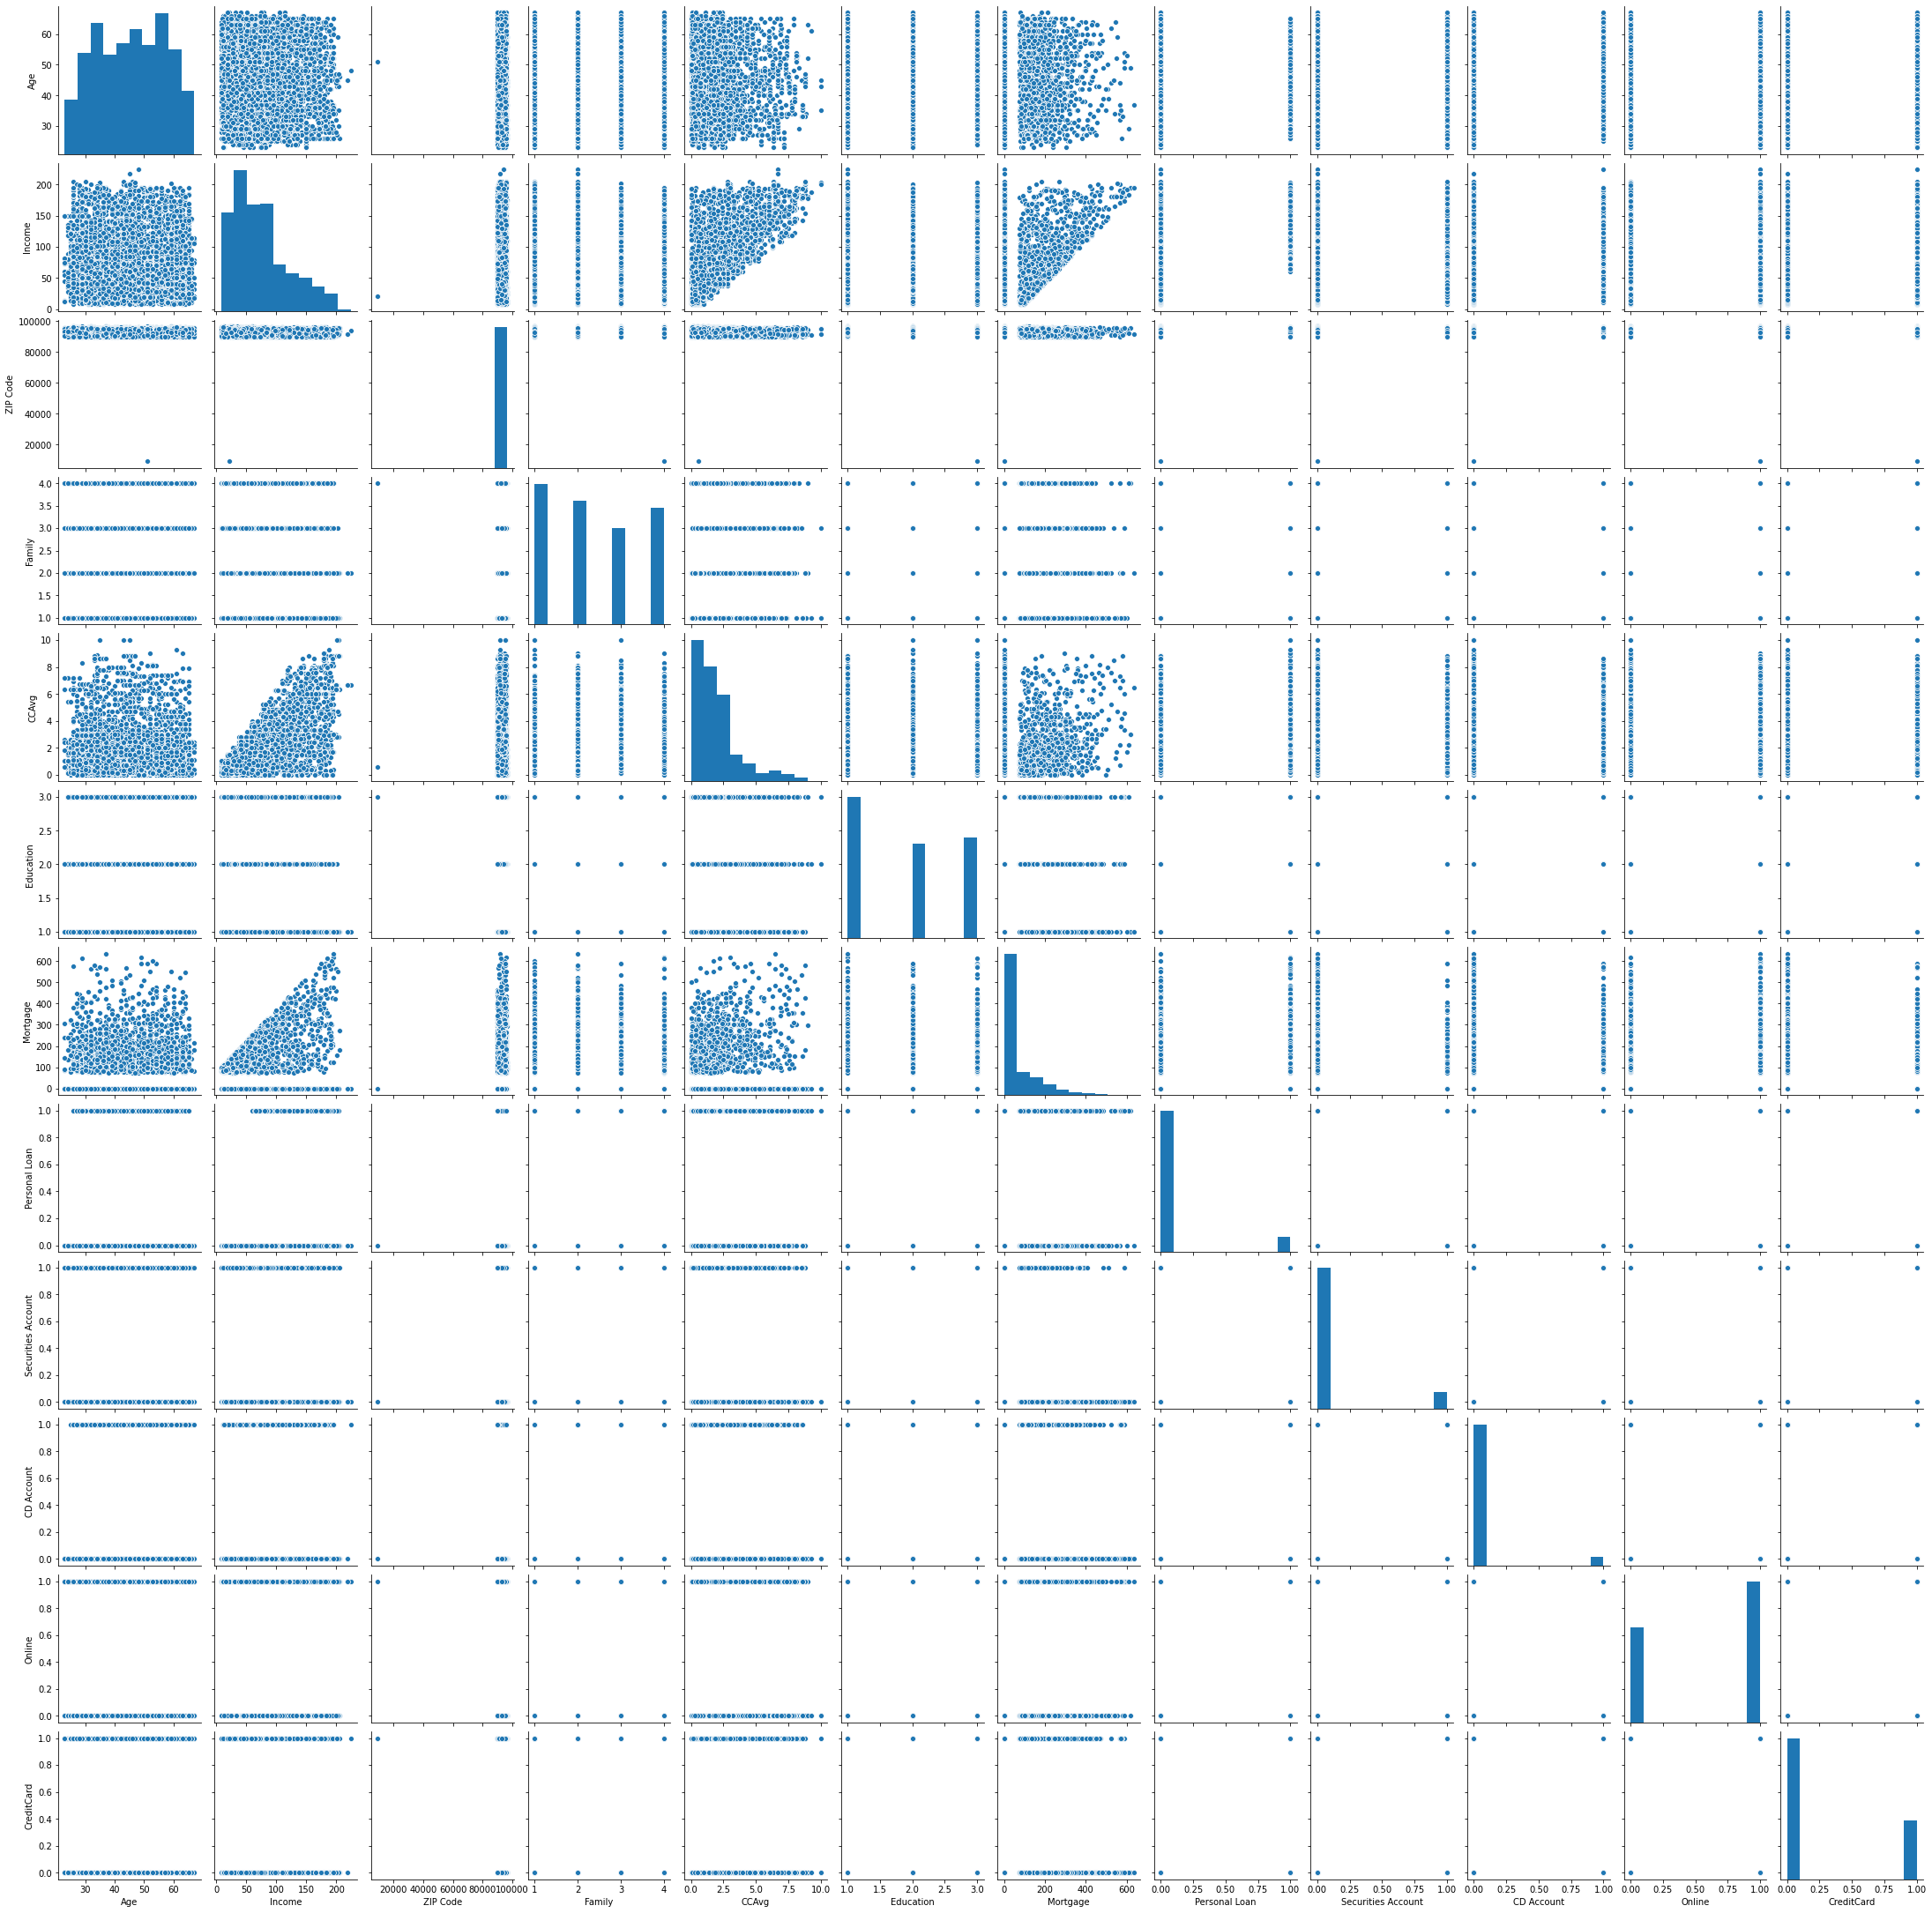

In [153]:
sns.pairplot(dataset);

In [154]:
##defining x and y
x=dataset[['Age','Income','CCAvg','Education','Mortgage','Securities Account']]
y=dataset['Personal Loan'].values

# 4.Transformation for the feature variables

In [155]:
from sklearn.preprocessing import PowerTransformer

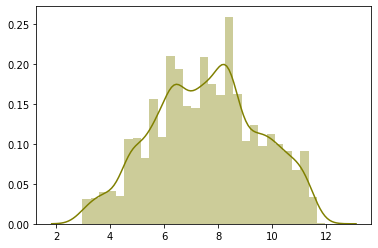

In [156]:
##Normalising Income
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['Income'].values.reshape(-1,1))
cnn= pt.transform(x['Income'].values.reshape(-1,1))
sns.distplot(cnn, color='olive');

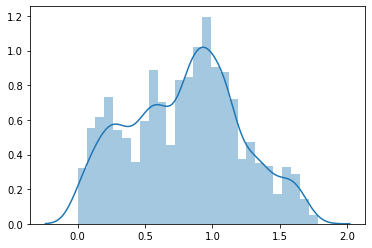

In [157]:
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['CCAvg'].values.reshape(-1,1))
temp= pt.transform(x['CCAvg'].values.reshape(-1,1))
sns.distplot(temp);

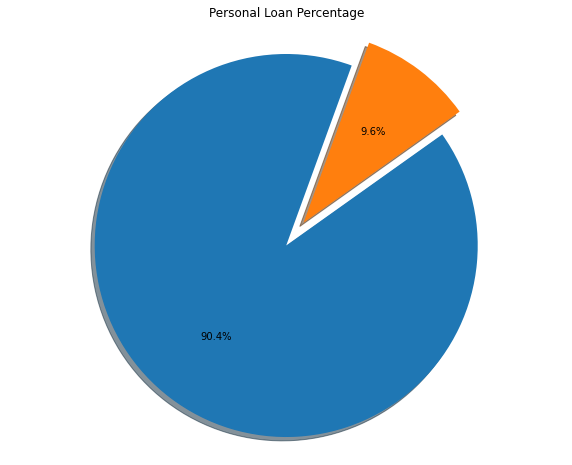

In [158]:
##approved for personal loan
tempDF=pd.DataFrame(dataset['Personal Loan'].value_counts()).reset_index()
tempDF.columns=['Labels','Personal Loan']
fig1, ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(tempDF['Personal Loan'],explode=explode,autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()


In [ ]:
##lable encoding
x['Mortgage_int']=pd.cut(x['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
x.drop('Mortgage',axis=1,inplace=True)

# 5.Splitting the data using stratified sampling

In [160]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y,stratify=y, random_state=0)

In [161]:
print('Shape of x_train is:', x_train.shape)
print('Shape of x_test is:', x_test.shape)
print('Shape of y_train is:', y_train.shape)
print('Shape of y_test is:', y_test.shape)

Shape of x_train is: (3750, 6)
Shape of x_test is: (1250, 6)
Shape of y_train is: (3750,)
Shape of y_test is: (1250,)


# Logistic Regression

In [162]:
import sklearn.metrics as metrics

In [163]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

In [164]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [165]:
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [166]:
pred11=log.predict(x_test)
pred22=log.predict(x_train)

In [167]:
## test confusion metrics
metrics.confusion_matrix(y_test,pred11)

array([[1115,   15],
       [  53,   67]])

In [168]:
## train confusion metrics
metrics.confusion_matrix(y_train,pred22)

array([[3336,   54],
       [ 166,  194]])

In [169]:
##test accuracy score
metrics.accuracy_score(y_test,pred11)

0.9456

In [170]:
## train accuracy score
metrics.accuracy_score(y_train,pred22)

0.9413333333333334

In [171]:
## test f1 score
metrics.f1_score(y_test,pred11)

0.6633663366336633

In [172]:
## train f1 score
metrics.f1_score(y_train,pred22)

0.6381578947368421

In [173]:
## train recall score
metrics.recall_score(y_train,pred22)

0.5388888888888889

In [174]:
metrics.recall_score(y_test,pred11)

0.5583333333333333

# Random Forest Classifier

In [175]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
f11= RandomForestClassifier()

In [176]:
f11.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [177]:
pred111=f11.predict(x_test)
pred222=f11.predict(x_train)

In [178]:
## test confusion metrics
metrics.confusion_matrix(y_test,pred111)

array([[1123,    7],
       [  30,   90]])

In [179]:
## train confusion metrics
metrics.confusion_matrix(y_train,pred222)

array([[3390,    0],
       [   0,  360]])

In [180]:
##test accuracy score
metrics.accuracy_score(y_test,pred111)

0.9704

In [96]:
## train accuracy score
metrics.accuracy_score(y_train,pred222)

1.0

In [181]:
## test f1 score
metrics.f1_score(y_test,pred111)

0.8294930875576036

In [182]:
## train f1 score
metrics.f1_score(y_train,pred222)

1.0

In [183]:
## test precision score
metrics.precision_score(y_test,pred111)

0.9278350515463918

In [184]:
## train precision score
metrics.precision_score(y_train,pred222)

1.0

In [185]:
##test recall score
metrics.recall_score(y_test,pred111)

0.75

In [186]:
## train recall score
metrics.recall_score(y_train,pred222)

1.0

# Decision Tree

In [187]:

from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()

In [188]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [189]:
clf.score(x_train,y_train)

1.0

In [190]:
pred1=clf.predict(x_test)
pred2=clf.predict(x_train)

In [191]:
## test confusion matrix
metrics.confusion_matrix(y_test,pred1)

array([[1106,   24],
       [  21,   99]])

In [192]:
## train confusion matrix
metrics.confusion_matrix(y_train,pred2)

array([[3390,    0],
       [   0,  360]])

In [116]:
##test accuracy score
metrics.accuracy_score(y_test,pred1)

0.964

In [193]:
##train accuracy score
metrics.accuracy_score(y_train,pred2)

1.0

In [194]:
##test recall score
metrics.recall_score(y_test,pred1)

0.825

In [195]:
## train recall score
metrics.recall_score(y_train,pred2)

1.0

# 9. Conclusion

**The analytical process started from data 
cleaning and processing, Missing value 
imputation with micepackage, then exploratory 
analysis and finally model building and 
evaluation. The best accuracy on public test set 
is 0.96. This brings some of the following 
insights about approval.
       Applicants with Credit history not 
passing fails to get approved, Probably because 
that they have a probability of a not paying back. 
Most of the Time, Applicants with high income 
sanctioning low amount is to more likely get 
approved which make sense, more likely to pay 
back their loans. Some basic characteristic 
gender and marital status seems not to be taken 
into consideration by the company.**